<a href="https://colab.research.google.com/github/m0ohannad/Image_Enhancement/blob/main/Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Histogram Equalization**

--2021-07-04 15:37:16--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 108.30K  --.-KB/s    in 0.1s    

2021-07-04 15:37:16 (1.02 MB/s) - ‘image.jpg’ saved [110895/110895]



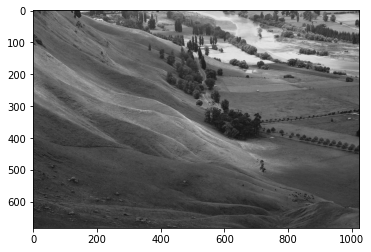

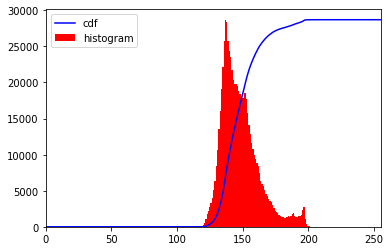

In [1]:
!wget -O image.jpg https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('image.jpg',0)

# Calcuate histograms and CDF
hist,bins = np.histogram(img.flatten(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max() # Normalize to have the same max for visualization

# Visualzie
plt.imshow(img, cmap='gray')
plt.figure()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,255], color = 'r')
plt.xlim([0,255])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

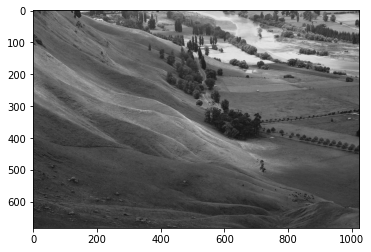

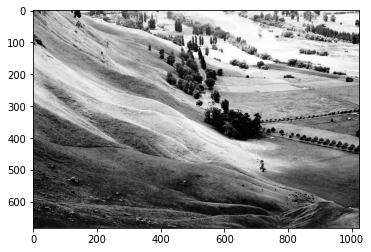

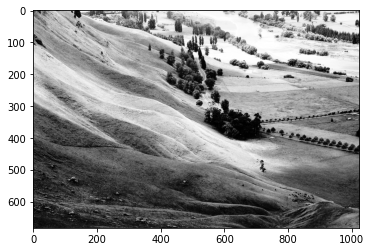

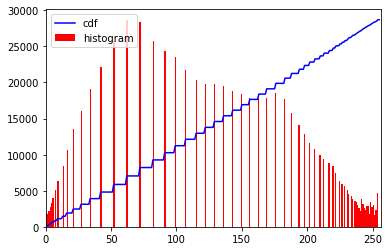

In [2]:
# Histgram Equalization Theoretically
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

# Histgram Equalization with OpenCV
img3 = cv2.equalizeHist(img)

# Calcuate histograms and CDF
hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max() / cdf2.max() # Normalize to have the same max for visualization

# Visualize results
plt.imshow(img, cmap='gray')
plt.figure()
plt.imshow(img2, cmap='gray')
plt.figure()
plt.imshow(img3, cmap='gray')
plt.figure()
plt.plot(cdf_normalized2, color = 'b')
plt.hist(img2.flatten(),256,[0,255], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

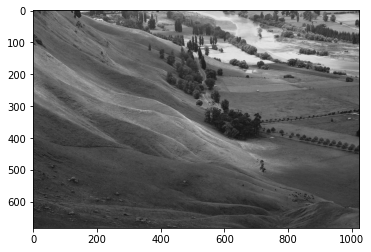

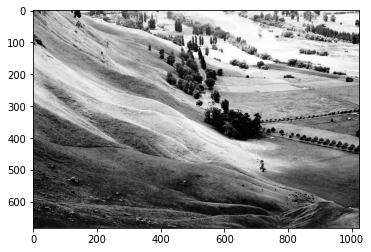

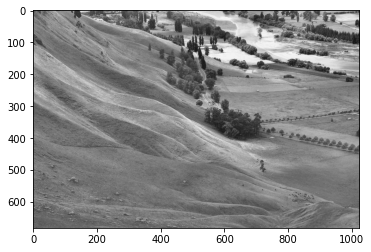

In [3]:
# Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

# Visualize results
plt.imshow(img, cmap='gray')
plt.figure()
plt.imshow(img2, cmap='gray')
plt.figure()
plt.imshow(cl1, cmap='gray')

**Masking Colors**

--2021-07-04 15:37:20--  https://raw.githubusercontent.com/heshameraqi/Image_Processing_Computer_Vision_1/main/flower.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13139 (13K) [image/jpeg]
Saving to: ‘flower.jpg’

flower.jpg          100%[===================>]  12.83K  --.-KB/s    in 0.001s  

2021-07-04 15:37:20 (18.5 MB/s) - ‘flower.jpg’ saved [13139/13139]



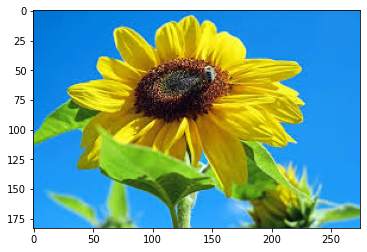

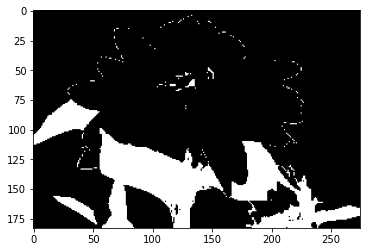

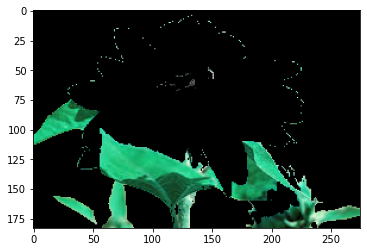

In [4]:
!wget -O flower.jpg https://raw.githubusercontent.com/heshameraqi/Image_Processing_Computer_Vision_1/main/flower.jpg

img = cv2.imread("flower.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Convert to HSV, In OpenCV: H: 0-179, S: 0-255, V: 0-255
mask = cv2.inRange(hsv, (36, 0, 0), (70, 255,255)) # Range between two colors
img2 = cv2.bitwise_and(img, img, mask = mask)

plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.figure()
plt.imshow(mask, cmap='gray')
plt.figure()
plt.imshow(img2, cmap='gray')

**Exercise: Change the last cell to detect the yellow color. Download an image and experiment on it using any of the following: Negative Transformation, Brightness Thresholding, Grey Level Slicing, and Contrast Stretching.**

--2021-07-04 15:37:21--  https://raw.githubusercontent.com/heshameraqi/Image_Processing_Computer_Vision_1/main/flower.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13139 (13K) [image/jpeg]
Saving to: ‘flower.jpg’

flower.jpg          100%[===================>]  12.83K  --.-KB/s    in 0.001s  

2021-07-04 15:37:21 (19.3 MB/s) - ‘flower.jpg’ saved [13139/13139]



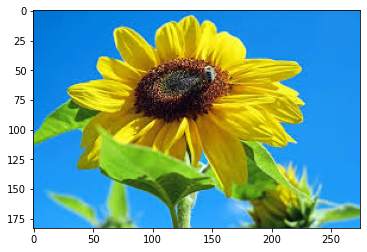

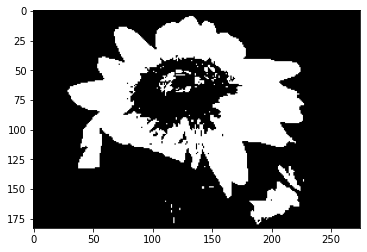

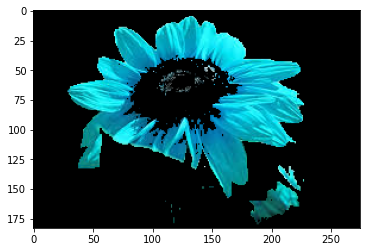

In [5]:
!wget -O flower.jpg https://raw.githubusercontent.com/heshameraqi/Image_Processing_Computer_Vision_1/main/flower.jpg

img = cv2.imread("flower.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Convert to HSV, In OpenCV: H: 0-179, S: 0-255, V: 0-255
mask = cv2.inRange(hsv, (20, 0, 0), (36, 255,255)) # Yellow color range
img2 = cv2.bitwise_and(img, img, mask = mask)

plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.figure()
plt.imshow(mask, cmap='gray')
plt.figure()
plt.imshow(img2, cmap='gray')